In [4]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the pre-trained MobileNetV2 model without the top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Adding a global pooling layer to reduce feature dimensions
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

# Assuming `base_model` is your loaded pretrained model without top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # This layer will average out the spatial dimensions
model = Model(inputs=base_model.input, outputs=x)

# Now `model` will output 2D features instead of 4D

# Prepare your data generators
data_gen = ImageDataGenerator(rescale=1./255)
generator = data_gen.flow_from_directory(
    '/Users/krishna/Semester2/GWAR/dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for feature extraction: keeps data in order
)

# Extract features
features = model.predict(generator, steps=len(generator))


Found 6160 images belonging to 6 classes.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


193/193 ━━━━━━━━━━━━━━━━━━━━ 193s 995ms/step


In [5]:
# Assuming you have a data generator `generator` set up
features = model.predict(generator, steps=len(generator))

# `features` should now be 2D: (number of samples, number of features)


193/193 ━━━━━━━━━━━━━━━━━━━━ 195s 1s/step


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, generator.classes, test_size=0.2, random_state=42)

# Initialize and train the Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
rf_score = rf.score(X_test, y_test)
print("Random Forest accuracy:", rf_score)


Random Forest accuracy: 0.9618506493506493


In [2]:
# Get the labels from the generator
labels = generator.classes


In [8]:
import matplotlib.pyplot as plt


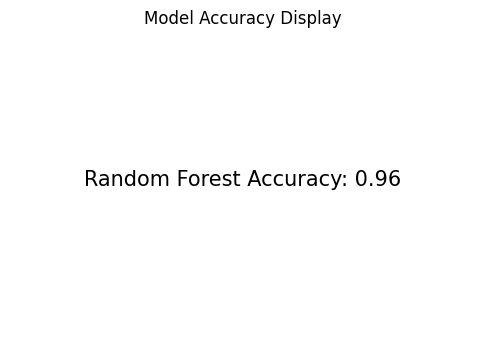

In [9]:
# Text box for displaying accuracy
plt.figure(figsize=(6, 4))
plt.text(0.5, 0.5, f'Random Forest Accuracy: {rf_score:.2f}', fontsize=15, ha='center')
plt.axis('off')  # Turn off axis
plt.title('Model Accuracy Display')
plt.show()


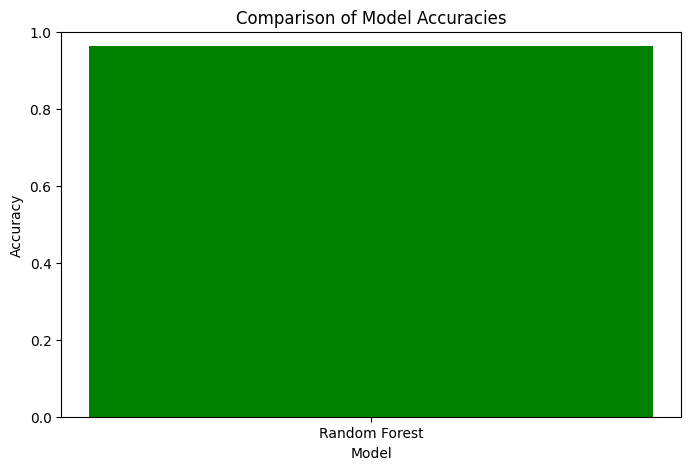

In [10]:
# Bar plot for displaying accuracy
models = ['Random Forest']
accuracies = [rf_score]
colors = ['green']

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim([0, 1])  # Set the limits of y-axis to 0-1 for percentage representation
plt.show()


In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, generator.classes, test_size=0.2, random_state=42)


In [12]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [13]:
rf_score = rf.score(X_test, y_test)


In [14]:
rf_score

0.9618506493506493

In [7]:
import matplotlib.pyplot as plt

# Names of models
models = ['Random Forest', 'SVM']  # Add other model names as needed

# Accuracy of each model
accuracies = [random_forest_accuracy, svm_accuracy]  # Add other accuracies as needed

# Creating the bar plot
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['green', 'blue'])  # You can change colors as needed
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim([0, 1])  # Set the limits of y-axis to 0-1 for percentage representation
plt.show()


NameError: name 'random_forest_accuracy' is not defined

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize and train the Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
rf_score = rf.score(X_test, y_test)
print("Random Forest accuracy:", rf_score)


ValueError: Found array with dim 4. RandomForestClassifier expected <= 2.

Accuracy: 0.9618506493506493
Precision: 0.9787618592399944
Recall: 0.8383528265107213
F1-Score: 0.8901243632085581


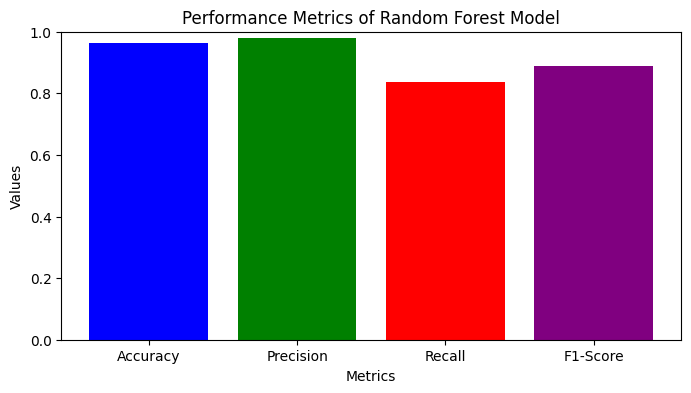

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'features' are your extracted CNN features and 'labels' are the corresponding labels
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, Y_train)

# Predict the labels for the test set
Y_pred = rf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='macro')
recall = recall_score(Y_test, Y_pred, average='macro')
f1 = f1_score(Y_test, Y_pred, average='macro')

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Plotting the metrics in a bar graph
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 4))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics of Random Forest Model')
plt.ylim(0, 1)  # Ensuring the y-axis starts at 0 and ends at 1 for clarity
plt.show()
